In [1]:
!pip install kagglehub


In [2]:
import kagglehub

# Download the Walmart dataset
path = kagglehub.dataset_download("yasserh/walmart-dataset")

print("✅ Dataset downloaded to:", path)


Using Colab cache for faster access to the 'walmart-dataset' dataset.
✅ Dataset downloaded to: /kaggle/input/walmart-dataset


In [3]:
import os

os.listdir(path)


['Walmart.csv']

In [4]:
import pandas as pd

df = pd.read_csv(f"{path}/Walmart.csv")
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(f"{path}/Walmart.csv")
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [8]:
print("Missing values (%):")
print(df.isna().mean() * 100)

print("\nDuplicate rows:", df.duplicated().sum())


Missing values (%):
Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

Duplicate rows: 0


In [9]:
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


Store: 45 unique values
Date: 143 unique values
Weekly_Sales: 6435 unique values
Holiday_Flag: 2 unique values
Temperature: 3528 unique values
Fuel_Price: 892 unique values
CPI: 2145 unique values
Unemployment: 349 unique values


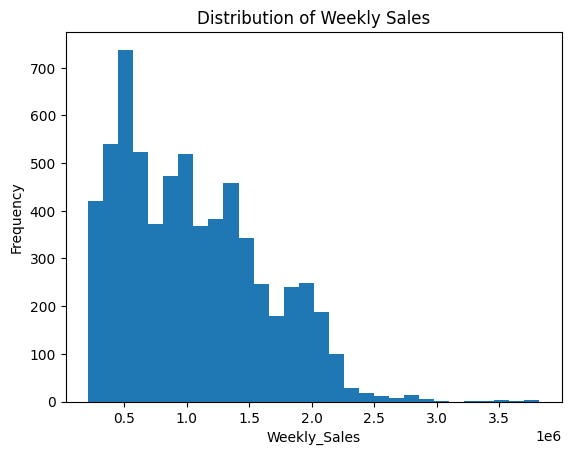

In [10]:
plt.hist(df['Weekly_Sales'], bins=30)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly_Sales")
plt.ylabel("Frequency")
plt.show()


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Weekly_Sales'])
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


ValueError: time data "19-02-2010" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [12]:
import seaborn as sns
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title("Sales on Holidays vs Non-Holidays")
plt.show()


ValueError: Could not interpret value `IsHoliday` for `x`. An entry with this name does not appear in `data`.